<a href="https://colab.research.google.com/github/add54/-Data-Analysis-plotly-Plotly-Whirlwind-Introduction.ipynb-/blob/master/Vehicle_Classification_Using_Silhouette_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd  

# preprocessing
from sklearn.preprocessing import StandardScaler


#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics  

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Label encoder 
from sklearn.preprocessing import LabelEncoder

# Support Vector Classifier
from sklearn.svm import SVC

# PCA Related
from sklearn.decomposition import PCA

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#load the csv file and make the data frame
#df = pd.read_csv('%matplotlib inline')

# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd  

# preprocessing
from sklearn.preprocessing import StandardScaler


#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics  

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Label encoder 
from sklearn.preprocessing import LabelEncoder

# Support Vector Classifier
from sklearn.svm import SVC

# PCA Related
from sklearn.decomposition import PCA

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#load the csv file and make the data frame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vehicle.csv")

In [ ]:
df.head()

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Cars are almost double in number as compared to bus and van,
Van is least in number

In [ ]:
#Label encode the target class
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

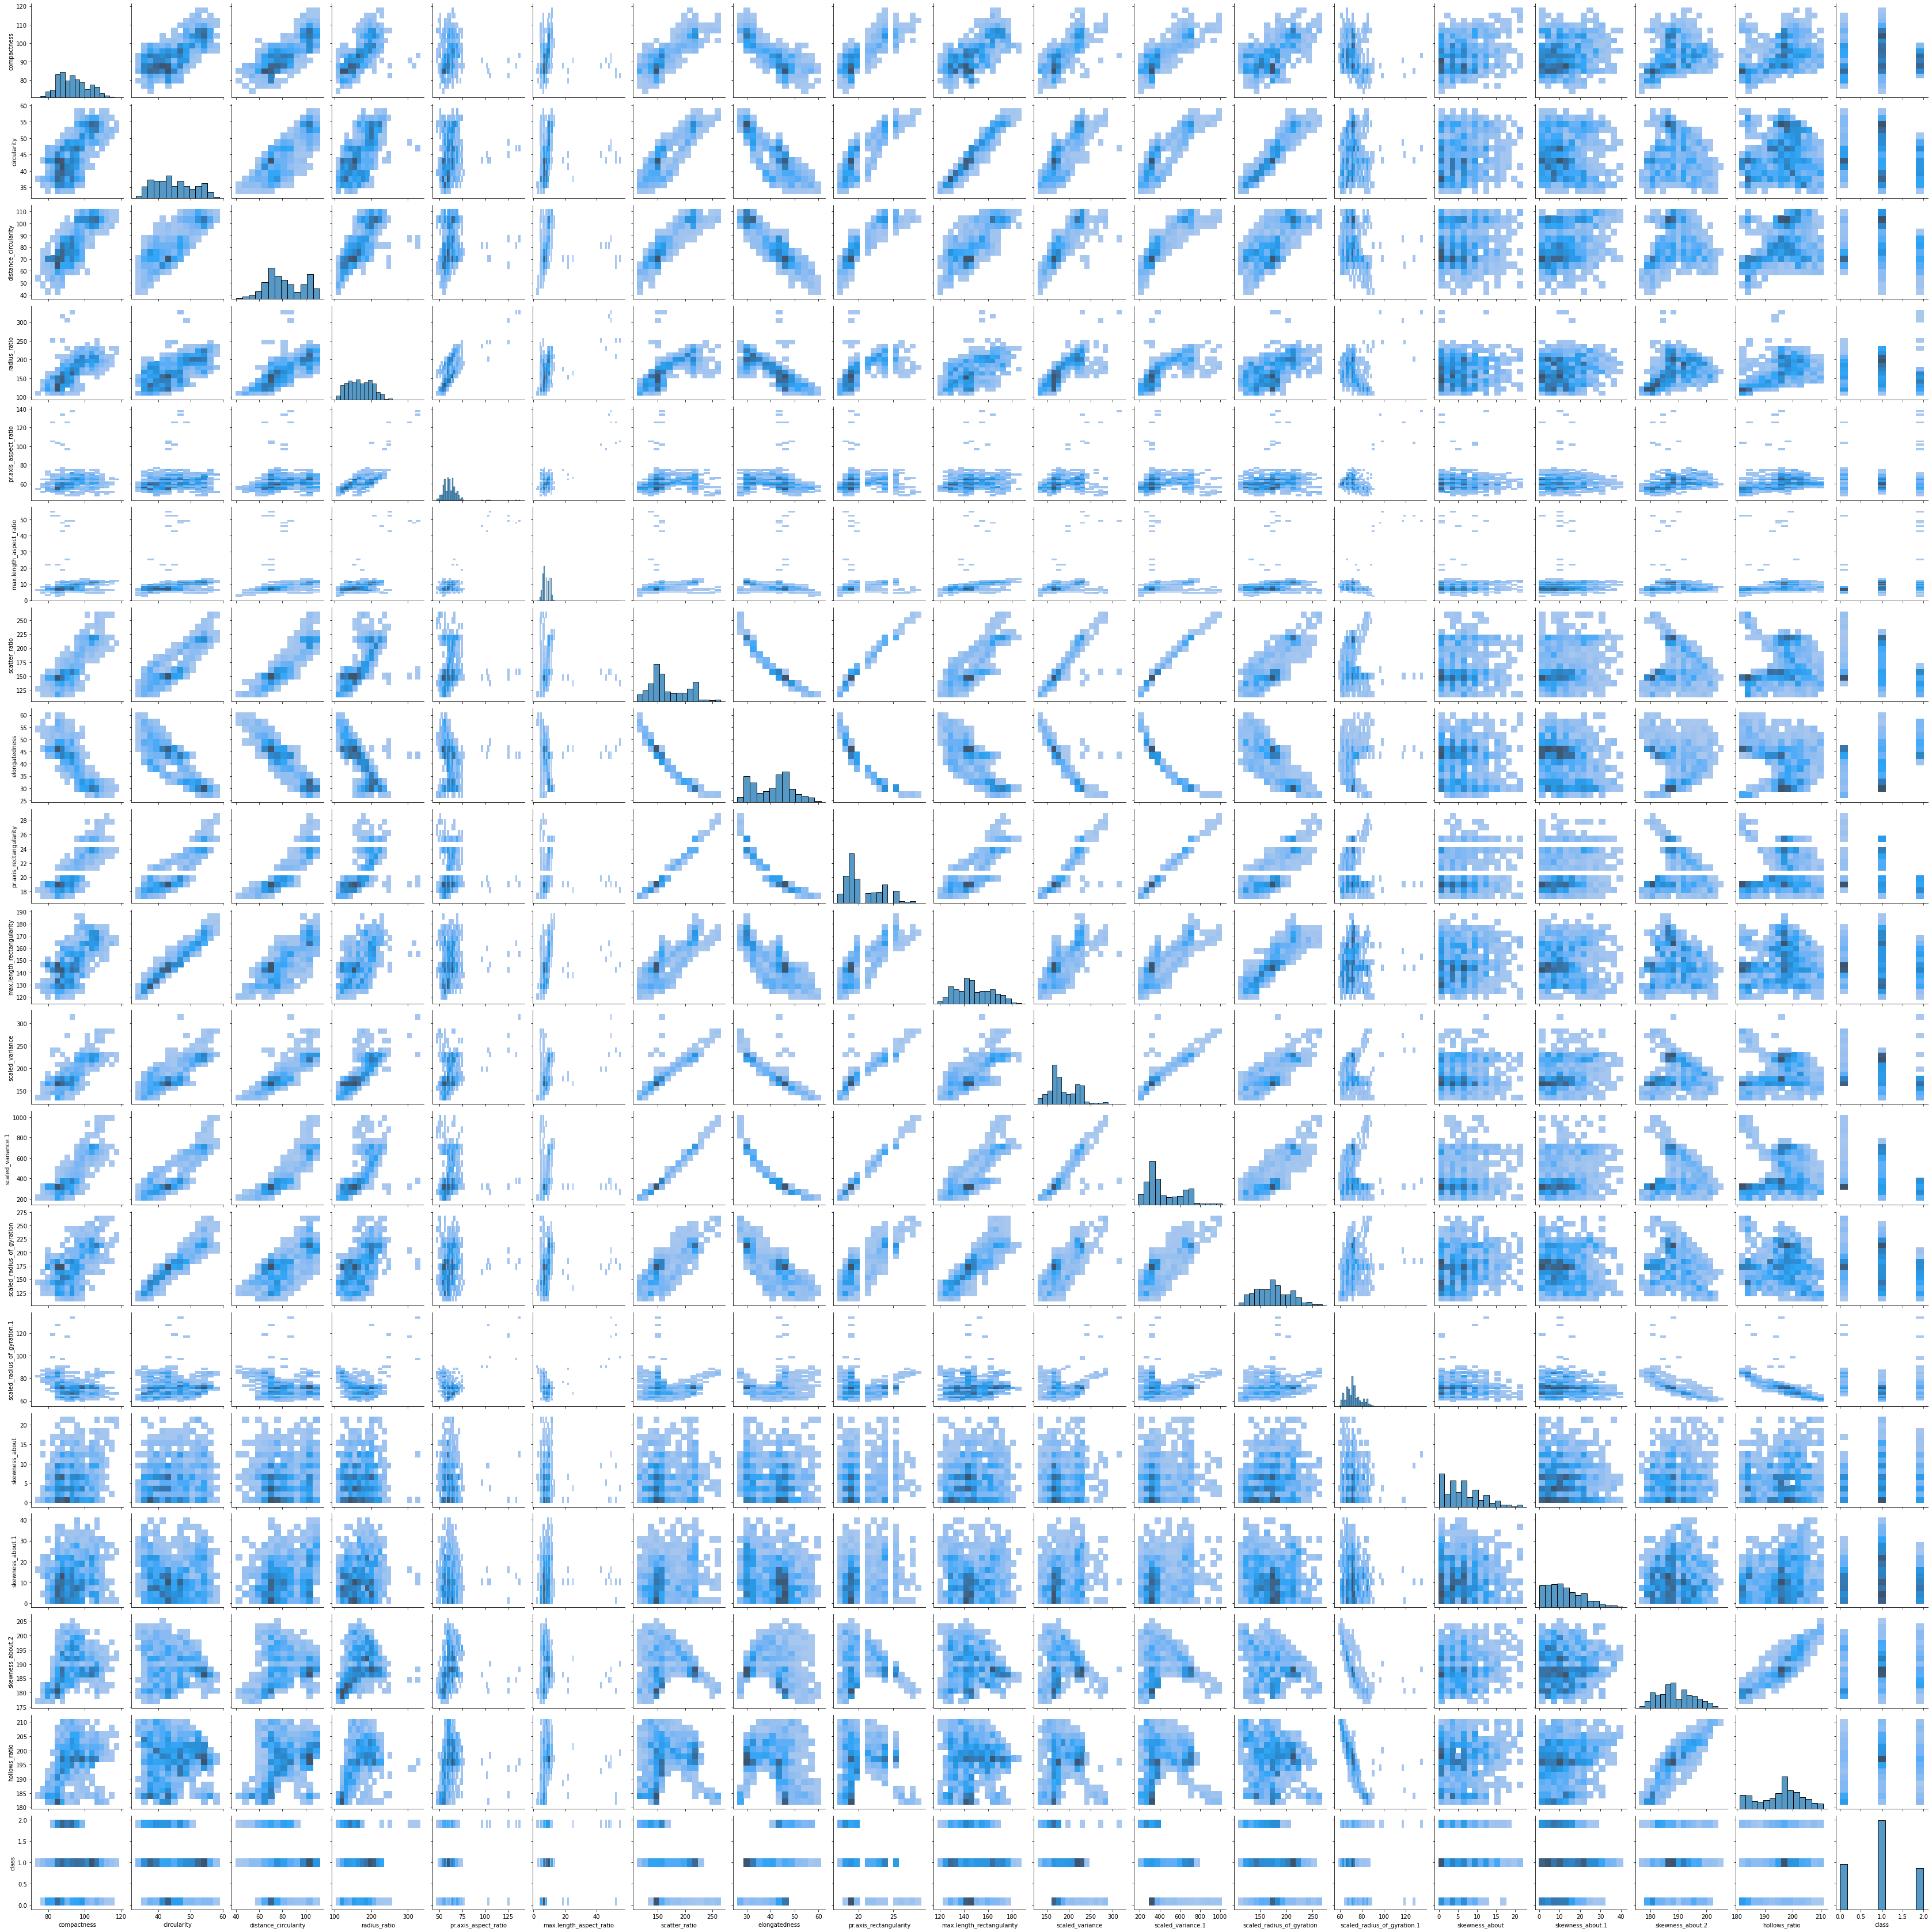

In [ ]:
sns.pairplot(df, kind="hist")

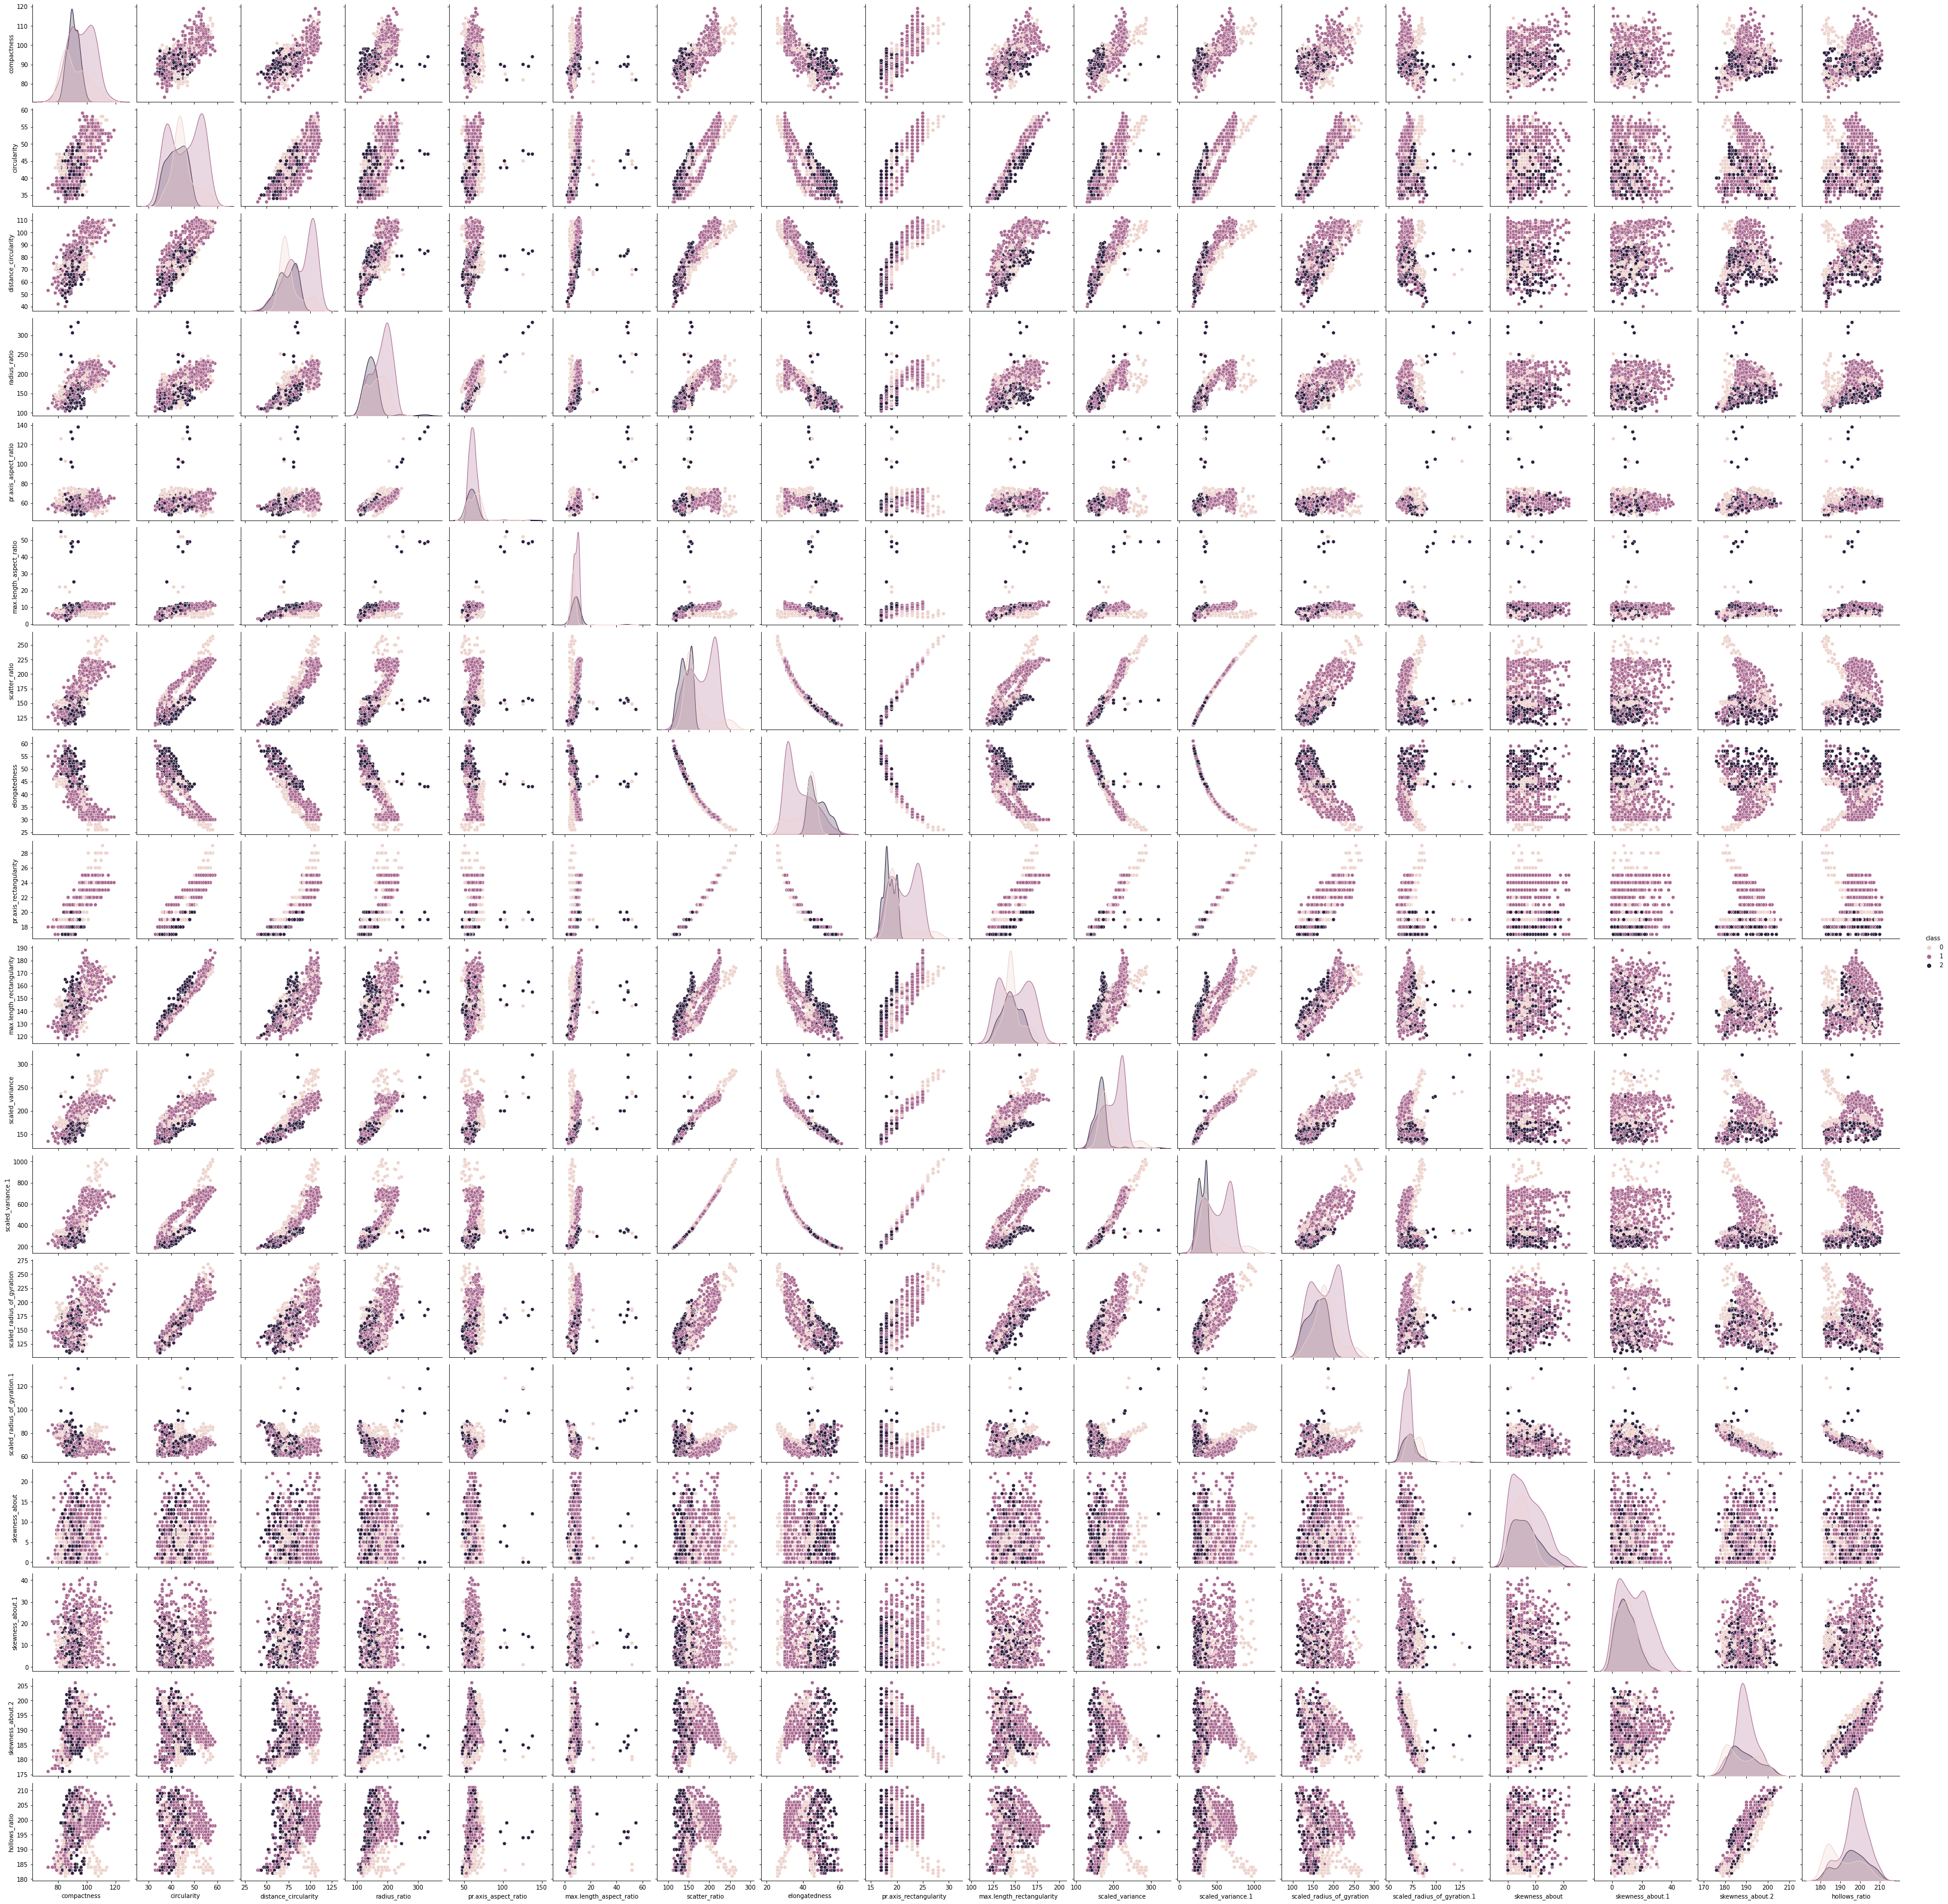

In [ ]:
sns.pairplot(df, diag_kind ='kde', hue='class')

Inferences:

Spread of compactness is least for van. mean compactness is highest for car. For Bus compactness is right skewed indicating that less number of buses have high compactness.
Mean circularity is higher for cars
Mean distance_circularity is also higher for cars
Mean radius_ratio is higher for cars, followed by Bus. It is least for vans
pr.axis_aspect_ratio is has almost same distribution for car, van and buses
max.length_aspect_ratio is almost same for cars and vans, lower for buses
Mean scatter ratio is highest for cars, followed by bus and van
Mean elomngatedness is highest for vans folowed by bus and car
pr.axis_rectangularity is highest for cars, followed by bus and then vans
distribution of max.length_rectangularity is almost same for cars, bus and vans
Mean scaled variance is highest for cars followed by bus then vans
Mean scaled variance1 is highest for cars followed by bus then vans
'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans.
'hollows_ratio' is lower for buses as compared to cars and vans
Many columns have lonmg tails indicating outliers
pr.axis_aspect ratio and radius ratio varies strongly +ve for van. for cars and buses it varies in small range- mostly cpuld like
Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship
Many features show high correlation indicating that we need to drop multiple features- we will use PCA for the same

#Correlation & Heatmap

In [ ]:
df.corr()

compactness  circularity  ...  hollows_ratio     class
compactness                     1.000000     0.689786  ...       0.365552 -0.033796
circularity                     0.689786     1.000000  ...       0.045652 -0.160546
distance_circularity            0.791707     0.797180  ...       0.333648 -0.065209
radius_ratio                    0.691081     0.625051  ...       0.472339 -0.182921
pr.axis_aspect_ratio            0.091779     0.154283  ...       0.267760 -0.098431
max.length_aspect_ratio         0.148249     0.251407  ...       0.143919  0.207619
scatter_ratio                   0.812770     0.858265  ...       0.118504 -0.288904
elongatedness                  -0.788736    -0.827246  ...      -0.216769  0.339348
pr.axis_rectangularity          0.814248     0.856603  ...       0.099481 -0.259102
max.length_rectangularity       0.676143     0.965729  ...       0.076770 -0.032399
scaled_variance                 0.764361     0.806791  ...       0.086708 -0.312836
scaled_variance.1               0.818674     0.850863  ...       0.103839 -0.288146
scaled_radius_of_gyration       0.585845     0.935950  ...      -0.118597 -0.250967
scaled_radius_of_gyration.1    -0.250603     0.053080  ...      -0.804793 -0.213049
skewness_about                  0.236685     0.144968  ...       0.097293  0.119652
skewness_about.1                0.157670    -0.011869  ...       0.205115 -0.010674
skewness_about.2                0.298528    -0.106339  ...       0.893869  0.067251
hollows_ratio                   0.365552     0.045652  ...       1.000000  0.235874
class                          -0.033796    -0.160546  ...       0.235874  1.000000

[19 rows x 19 columns]

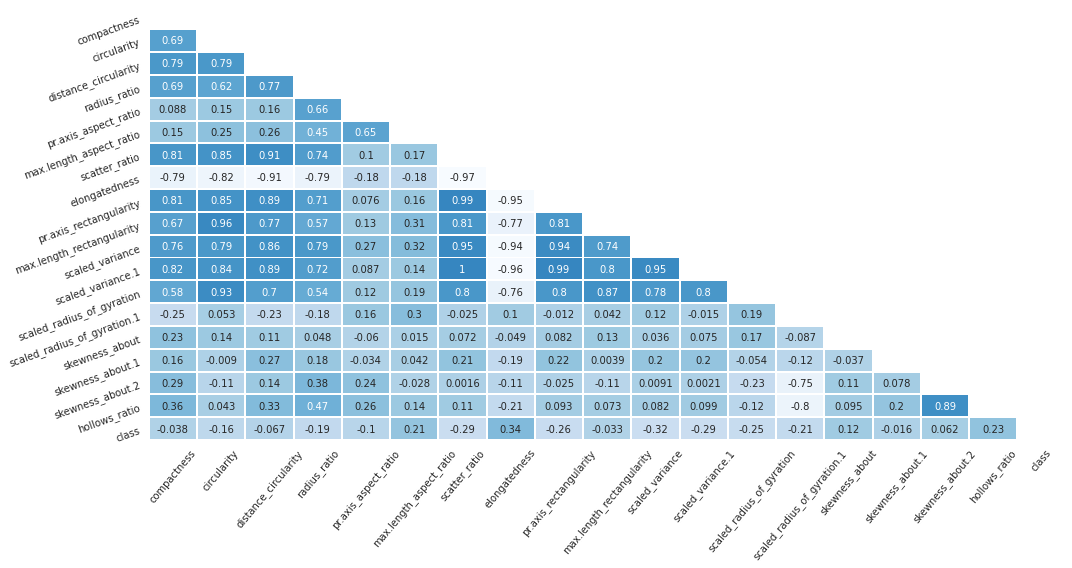

In [ ]:
#Heatmap 
#Correlation Matrix
corr = df.corr() # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.tight_layout()
plt.show()

#Inference from heat map:
From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has correlation of 1 and many other features are also there which having more than 0.9(positive or negative) correlation e.g sekweness_abou2 and hollows_ratio, scaled variance & scaled_variance1, elongatedness & scaled variance, elongatedness & scaled variance1 etc.

There are lot of dimensions with correlation above +- 0.7 and it is difficult to determine which dimensions to drop manually. We will use PCA to determine it


In [ ]:
df.describe().T

count        mean  ...     75%     max
compactness                  840.0   93.694048  ...  100.00   119.0
circularity                  840.0   44.836905  ...   49.00    59.0
distance_circularity         840.0   82.122024  ...   98.00   112.0
radius_ratio                 840.0  169.065476  ...  195.00   333.0
pr.axis_aspect_ratio         840.0   61.704762  ...   65.00   138.0
max.length_aspect_ratio      840.0    8.577381  ...   10.00    55.0
scatter_ratio                840.0  168.886905  ...  198.00   265.0
elongatedness                840.0   40.911905  ...   46.00    61.0
pr.axis_rectangularity       840.0   20.582143  ...   23.00    29.0
max.length_rectangularity    840.0  148.010714  ...  159.25   188.0
scaled_variance              840.0  188.730357  ...  217.00   320.0
scaled_variance.1            840.0  439.923810  ...  587.00  1018.0
scaled_radius_of_gyration    840.0  174.694048  ...  198.00   268.0
scaled_radius_of_gyration.1  836.0   72.406699  ...   75.00   135.0
skewness_about               836.0    6.363636  ...    9.00    22.0
skewness_about.1             840.0   12.623810  ...   19.00    41.0
skewness_about.2             839.0  188.949940  ...  193.00   206.0
hollows_ratio                840.0  195.678571  ...  201.00   211.0
class                        840.0    0.982143  ...    1.00     2.0

[19 rows x 8 columns]

From above table it is clear that there are missing values in many columns-circularity,distance_circularity,radius_ratio scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1 skewness_about,skewness_about.skewness_about.2

In [ ]:
#Columns having missing values
missing_values_cols=df.columns[df.isnull().any()]
# Number of missing values in each column
df[missing_values_cols].isnull().sum()

scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.2               1
dtype: int64

In [ ]:
#List all the rows having missing value in any of the single or multiple columns

df[df.isnull().any(axis=1)][missing_values_cols].head()

scaled_radius_of_gyration.1  skewness_about  skewness_about.2
66                           NaN             NaN             179.0
77                           NaN             2.0             180.0
141                         86.0             NaN             179.0
177                         69.0             NaN             191.0
192                          NaN            14.0             189.0

In [ ]:
df[df.isnull().any(axis=1)][missing_values_cols].shape
#here are total 33 rows with missng values in one or more of 14 columns

(8, 3)

#Missing Values Treatment:
Find individual row with missing values in each of the columns and then we will make decision on whether to drop or not¶

In [ ]:
df[df['circularity'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

In [ ]:
# 5 rows have missing vales for circularity. one of the 5 rows alsq has missing value for distance_circularity. 
# Another row has missing values for scaled valiance and skewness_about.1. One of the row has missing value for scaled_radius_of_gyration.
# We will drop those rows which has missing value in any other coulmn as well apart from circularity which is 3. 
# will impute missing value in rest 2 rows.

In [ ]:
# Row 105,118,266 has missing values in more than 1 column. drop those
df.drop([105,118,266], inplace=True)

KeyError: ignored

In [ ]:
# Now lets Check the class level of remaining 2 rows- we will replace the value with median value of the corresponding class
df.loc[5].loc['class'],df.loc[396].loc['class']

(0.0, 0.0)

In [ ]:
# Belong to Bus Class
Median_circularity_bus=df['circularity'][df['class']==0].median()
Median_circularity_bus

44.0

In [ ]:
df['circularity'].fillna(Median_circularity_bus, inplace=True)

In [ ]:
# Douple Check if missing values have been teated for curcularity
df[df['circularity'].isnull()][missing_values_cols]


Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

In [ ]:
df.columns
# Missing value for Circularity treated

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [ ]:
#Missing Treatment Values for distance_circularity
df[df['distance_circularity'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
35          46.0                   NaN  ...               7.0             192.0
207         42.0                   NaN  ...               6.0             179.0
319         51.0                   NaN  ...               7.0             188.0

[3 rows x 14 columns]

In [ ]:
# 3 rows have missing values. row 207 has missing  values in more than 1 column- we will drop this
# row 35, 319 have missing values in just one column, We will fill it woth median of the corresponding class

df.drop(207, inplace=True)

In [ ]:
df.shape

(842, 19)

In [ ]:
# Now lets Check the class lavel of remeining 2 rows- we will replace the value with median value of the corresponding class
df.loc[35].loc['class'],df.loc[319].loc['class']

(2.0, 0.0)

In [ ]:
Median_distance_circularity_van=df['distance_circularity'][df['class']==2].median()
Median_distance_circularity_bus=df['distance_circularity'][df['class']==0].median()
Median_distance_circularity_van,Median_distance_circularity_bus

(75.0, 72.5)

In [ ]:
df.loc[35]=df.loc[35].replace(np.nan,Median_distance_circularity_van)

In [ ]:
df.loc[319]=df.loc[319].replace(np.nan,Median_distance_circularity_bus)

In [ ]:
df.loc[[35,319]]

compactness  circularity  ...  hollows_ratio  class
35         100.0         46.0  ...          200.0    2.0
319        102.0         51.0  ...          186.0    0.0

[2 rows x 19 columns]

In [ ]:
# Double Check if missing values have been handled
df[df['distance_circularity'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

In [ ]:
#Missing values handled for median_distance_circularity

In [ ]:
df[df['radius_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
9           44.0                  98.0  ...              14.0             195.0
78          52.0                  94.0  ...               4.0             193.0
159         45.0                  75.0  ...               2.0             193.0
287         43.0                  84.0  ...               2.0             185.0
345         54.0                 106.0  ...              14.0             185.0
467         54.0                 104.0  ...              23.0             186.0

[6 rows x 14 columns]

In [ ]:
# For all the rows with missing radius_ratio only radius ratio is having missing values all the other columns have values.
# We will not drop any rather replace with median of corresponding class.

In [ ]:
df.loc[[9,78,159,287,345,467]]['class']

9      1.0
78     0.0
159    1.0
287    2.0
345    0.0
467    1.0
Name: class, dtype: float64

In [ ]:
# Lets find median value for car, bus,van
Median_distance_radius_ratio_van=df['radius_ratio'][df['class']==2].median()
Median_distance_radius_ratio_bus=df['radius_ratio'][df['class']==0].median()
Median_distance_radius_ratio_car=df['radius_ratio'][df['class']==1].median()
Median_distance_radius_ratio_van,Median_distance_radius_ratio_bus,Median_distance_radius_ratio_car

(144.0, 169.0, 186.0)

 Replace rows 9,159 and 467 with car median, 78,345 with bus median and 287 with  van

In [ ]:
df.loc[[9,159,467]]=df.loc[[9,159,467]].replace(np.nan,Median_distance_radius_ratio_car)

In [ ]:
df.loc[[9,159,467]]

compactness  circularity  ...  hollows_ratio  class
9           93.0         44.0  ...          204.0    1.0
159         91.0         45.0  ...          198.0    1.0
467         96.0         54.0  ...          194.0    1.0

[3 rows x 19 columns]

In [ ]:
df.loc[[78,345 ]]=df.loc[[ 78,345 ]].replace(np.nan,Median_distance_radius_ratio_bus)

In [ ]:
df.loc[[78,345 ]]

compactness  circularity  ...  hollows_ratio  class
78         104.0         52.0  ...          191.0    0.0
345        101.0         54.0  ...          185.0    0.0

[2 rows x 19 columns]

In [ ]:
df.loc[287]=df.loc[287].replace(np.nan,Median_distance_radius_ratio_van)

In [ ]:
df.loc[[287]]

compactness  circularity  ...  hollows_ratio  class
287         88.0         43.0  ...          196.0    2.0

[1 rows x 19 columns]

#Missing Treatment Values for pr.axis_aspect_ratio

In [ ]:
df[df['pr.axis_aspect_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
19          56.0                 100.0  ...               5.0             186.0
222         50.0                  81.0  ...               1.0             197.0

[2 rows x 14 columns]

In [ ]:
# There are 2 rows with missing values. One row has missing value in one more column in addityion to pr.axis_aspect_ratio
# We will drop that row but treat the missing value in pr.axis_aspect_ratio with median of corresponding class

In [ ]:
# drop row 222
df.drop(222, inplace=True)

In [ ]:
df.loc[19]['class']

1.0

In [ ]:
Median_distance_pr_axis_aspect_ratio_car=df['pr.axis_aspect_ratio'][df['class']==1].median()
Median_distance_pr_axis_aspect_ratio_car

61.0

In [ ]:
df.loc[19]=df.loc[19].replace(np.nan,Median_distance_pr_axis_aspect_ratio_car)

In [ ]:
df[df['pr.axis_aspect_ratio'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#Missing Treatment Values for scatter_ratio

In [ ]:
df[df['scatter_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
249         34.0                  53.0  ...              20.0             185.0

[1 rows x 14 columns]

In [ ]:
# Only one row and 2 cols have missing value in that row including scatter_ratio
# we will drop this row
df.drop(249, inplace=True)

#Missing Treatment Values for elongatednes

In [ ]:
df[df['elongatedness'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
215         39.0                  86.0  ...              22.0             185.0

[1 rows x 14 columns]

In [ ]:
df.loc[215]['class']

1.0

In [ ]:
Median_distance_elongatedness_car=df['elongatedness'][df['class']==1].median()
Median_distance_elongatedness_car

36.0

In [ ]:
df.loc[215]=df.loc[215].replace(np.nan,Median_distance_elongatedness_car)

In [ ]:
df[df['elongatedness'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#Missing Treatment Values for pr.axis_rectangularity

In [ ]:
df[df['pr.axis_rectangularity'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
70          55.0                  98.0  ...               6.0             185.0
237         45.0                  65.0  ...              10.0             179.0
273         45.0                  80.0  ...              10.0             199.0

[3 rows x 14 columns]

In [ ]:
# 3 rows have missing values for pr.axis_rectangularity and only this column has missing value
# We will replace this with median value of the corresponding class

In [ ]:
#lets loom at class level of the missing rows
df.loc[[70,237,273]]['class']

70     1.0
237    0.0
273    2.0
Name: class, dtype: float64

In [ ]:
Median_distance_pr_axis_rectangularity_van=df['pr.axis_rectangularity'][df['class']==2].median()
Median_distance_pr_axis_rectangularity_car=df['pr.axis_rectangularity'][df['class']==1].median()
Median_distance_pr_axis_rectangularity_bus=df['pr.axis_rectangularity'][df['class']==0].median()
Median_distance_pr_axis_rectangularity_van,Median_distance_pr_axis_rectangularity_car,Median_distance_pr_axis_rectangularity_bus

(18.0, 22.0, 19.0)

In [ ]:
df.loc[70]=df.loc[70].replace(np.nan,Median_distance_pr_axis_rectangularity_car)
df.loc[237]=df.loc[237].replace(np.nan,Median_distance_pr_axis_rectangularity_bus)
df.loc[273]=df.loc[273].replace(np.nan,Median_distance_pr_axis_rectangularity_van)

In [ ]:
# Double Check if missing values have been treated
df[df['pr.axis_rectangularity'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

#Missing Treatment Values for scaled_variance

In [ ]:
df[df['scaled_variance'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

In [ ]:
# 2 rows have missing values for scaled_variance, no other columns have missing values for these rows. We will replace with median
# of corresponding class

In [ ]:
df.loc[[372,522]]['class']

372    2.0
522    1.0
Name: class, dtype: float64

In [ ]:
Median_distance_scaled_variance_van=df['scaled_variance'][df['class']==2].median()
Median_distance_scaled_variance_car=df['scaled_variance'][df['class']==1].median()
Median_distance_scaled_variance_van,Median_distance_scaled_variance_car

(164.0, 206.5)

In [ ]:
df.loc[372]=df.loc[372].replace(np.nan,Median_distance_scaled_variance_van)
df.loc[522]=df.loc[522].replace(np.nan,Median_distance_scaled_variance_car)

In [ ]:
df[df['scaled_variance'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

In [ ]:
df[df['scaled_variance.1'].isnull()][missing_values_cols]

circularity  distance_circularity  ...  skewness_about.1  skewness_about.2
308         51.0                 100.0  ...               3.0             196.0
496         55.0                  98.0  ...              29.0             189.0

[2 rows x 14 columns]

In [ ]:
# 2 rows have missing values for scaled_variance, no other columns have missing values for these rows. We will replace with median
# of corresponding class

In [ ]:
df.loc[[308,496]]['class']

308    1.0
496    1.0
Name: class, dtype: float64

In [ ]:
Median_distance_scaled_variance1_car=df['scaled_variance.1'][df['class']==1].median()
Median_distance_scaled_variance1_car

512.0

In [ ]:
df.loc[[308,496]]=df.loc[[ 308,496]].replace(np.nan,Median_distance_scaled_variance1_car)

In [ ]:
df[df['scaled_variance.1'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

#Missing Treatment Values for scaled_radius_of_gyration.1

In [ ]:
df[df['scaled_radius_of_gyration.1'].isnull()][missing_values_cols]

scaled_radius_of_gyration.1  skewness_about  skewness_about.2
77                           NaN             2.0             180.0
192                          NaN            14.0             189.0
329                          NaN             5.0             192.0

In [ ]:
# there are 4  rows with scaled_radius_of_gyration.1 as missing values
# row with index 66 has missing values in 2 columns- will be dropped
# Other 3 rows missing values will be replaced with median value of cotresponding class

In [ ]:
# Drop row 66
df.drop(66, inplace=True)

In [ ]:
df.loc[[77,192,329]]['class']

77     1.0
192    1.0
329    1.0
Name: class, dtype: float64

In [ ]:
Median_distance_radius_gyr1_car=df['scaled_radius_of_gyration.1'][df['class']==1].median()
Median_distance_radius_gyr1_car

70.0

In [ ]:
df.loc[[77,192,329]]=df.loc[[ 77,192,329]].replace(np.nan,Median_distance_radius_gyr1_car)

In [ ]:
df[df['scaled_radius_of_gyration.1'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

#Missing Values Treatment for skewness_about

In [ ]:
df[df['skewness_about'].isnull()][missing_values_cols]

scaled_radius_of_gyration.1  skewness_about  skewness_about.2
141                         86.0             NaN             179.0
177                         69.0             NaN             191.0
285                         64.0             NaN             195.0

In [ ]:
# 3 rows have missing values  in skewness_about column , no other column has missing value for these rows. 
# we will replace these values with median of the corresponding class

In [ ]:
df.loc[[141,177,285]]['class']

141    0.0
177    0.0
285    1.0
Name: class, dtype: float64

In [ ]:
Median_distance_skewness_about_car=df['skewness_about'][df['class']==1].median()
Median_distance_skewness_about_bus=df['skewness_about'][df['class']==0].median()
Median_distance_skewness_about_car,Median_distance_skewness_about_bus

(6.0, 5.0)

In [ ]:
df.loc[[141,177]]=df.loc[[141,177]].replace(np.nan,Median_distance_skewness_about_bus)

In [ ]:
df.loc[[285]]=df.loc[[285]].replace(np.nan,Median_distance_skewness_about_car)

In [ ]:
df[df['skewness_about'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

#Missing Values Treatment for skewness_about.1

In [ ]:
df[df['skewness_about.1'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

In [ ]:
#  No longer Missing values- corresponding row
#has been dropped while treating other missing values

In [ ]:
df[df['skewness_about.2'].isnull()][missing_values_cols]

scaled_radius_of_gyration.1  skewness_about  skewness_about.2
419                         63.0             5.0               NaN

In [ ]:
# One row has missing value for skewness_about.2 and no other value is missing for that row
# Lets replace that value with median of the corresponding class

In [ ]:
df.loc[419]['class']

1.0

In [ ]:
Median_distance_skewness_about2_car=df['skewness_about.2'][df['class']==1].median()
Median_distance_skewness_about2_car

189.0

In [ ]:
df.loc[[419]]=df.loc[[419]].replace(np.nan,Median_distance_skewness_about2_car)

In [ ]:
df[df['skewness_about.2'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [scaled_radius_of_gyration.1, skewness_about, skewness_about.2]
Index: []

#Data Frame Summary Statistics after missing values treatment

In [ ]:
df.describe().T

count        mean  ...    75%     max
compactness                  839.0   93.709178  ...  100.0   119.0
circularity                  839.0   44.839094  ...   49.0    59.0
distance_circularity         839.0   82.138856  ...   98.0   112.0
radius_ratio                 839.0  169.117998  ...  195.0   333.0
pr.axis_aspect_ratio         839.0   61.710369  ...   65.0   138.0
max.length_aspect_ratio      839.0    8.578069  ...   10.0    55.0
scatter_ratio                839.0  168.910608  ...  198.0   265.0
elongatedness                839.0   40.905840  ...   46.0    61.0
pr.axis_rectangularity       839.0   20.584029  ...   23.0    29.0
max.length_rectangularity    839.0  148.013111  ...  159.5   188.0
scaled_variance              839.0  188.753874  ...  217.0   320.0
scaled_variance.1            839.0  440.063170  ...  587.0  1018.0
scaled_radius_of_gyration    839.0  174.697259  ...  198.0   268.0
scaled_radius_of_gyration.1  839.0   72.398093  ...   75.0   135.0
skewness_about               839.0    6.359952  ...    9.0    22.0
skewness_about.1             839.0   12.617402  ...   19.0    41.0
skewness_about.2             839.0  188.961859  ...  193.0   206.0
hollows_ratio                839.0  195.692491  ...  201.0   211.0
class                        839.0    0.983313  ...    1.0     2.0

[19 rows x 8 columns]

In [ ]:
#Only 7/846 rows i.e 0.8 % record has been dropped -should be okay¶

#Outlier Treatment
```



In [ ]:
#Split into Train -Test set
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random number seeding for reapeatability of the code
df_train, df_test= train_test_split(df, test_size=test_size, random_state=seed)
df_train.shape, df_test.shape

((587, 19), (252, 19))

In [ ]:
## function to find outliers and quantile values.
# We will analyse each of the outliers and follow below strategy
# 1. High outliers if close to max value will be replaced with max value of the corresponding class
# 2. if high outlier is much above 75 Quantile value- we will drop that row from our analysis
# 3. Low outlier if close to min value will be replaced by min value of the corresponding class
# 4. low outlier if much lower than 25 quantile value will be dropped fromm analysis

def handleOutlier(aSeries):
    
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
   
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < fence_low)]
    outliers_high= aSeries[(aSeries > fence_high)]
    
    print ("25th Quantile value: ", q1)
    print('Outlier low Count =', outliers_low.count())
    print('List of Low outliers: \n')
    print(outliers_low)

    print ("75th Quantile value: ", q3)
    print('Outlier High Count = ', outliers_high.count())
    print('List of High outliers: \n')
    print(outliers_high)

#Compactness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

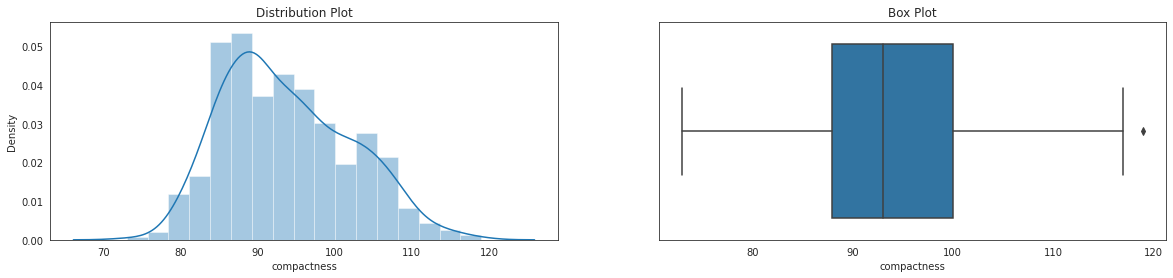

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['compactness'],ax=ax2)
ax2.set_title("Box Plot")

In [ ]:
handleOutlier(df_train['compactness'])

25th Quantile value:  88.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: compactness, dtype: float64)
75th Quantile value:  100.0
Outlier High Count =  1
List of High outliers: 

44    119.0
Name: compactness, dtype: float64


In [ ]:
#Lets see the complete row
df_train.loc[[44]]

compactness  circularity  ...  hollows_ratio  class
44        119.0         54.0  ...          202.0    1.0

[1 rows x 19 columns]

In [ ]:
#class is car. Lets observe few rows with class car- in terms of max values as it is high outlier
df_train[df_train['class']==1]['compactness'].sort_values( ascending=False).head(5)

44     119.0
346    117.0
283    116.0
761    115.0
788    115.0
Name: compactness, dtype: float64

In [ ]:
# There are values like 117,116 so we will not treat this outlier. 119 does not seem to be do far.

#Circularity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

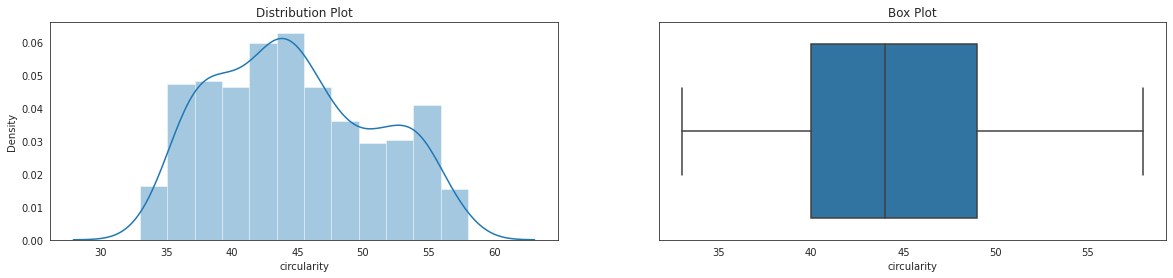

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in circularity

#Distance Circularity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

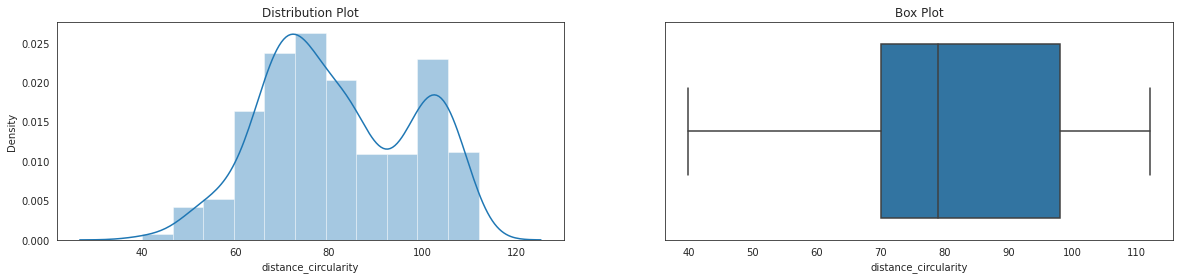

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

#Radius_ratio Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

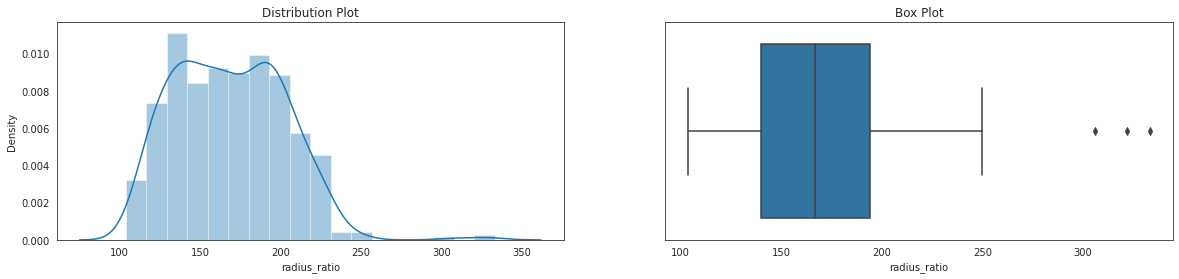

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

There are certain outliers on the right side( high ouliers).Lets analyse them and make decision on their treatment
 handleOutlier(df_train['radius_ratio'])

In [ ]:
 handleOutlier(df_train['radius_ratio'])

25th Quantile value:  140.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: radius_ratio, dtype: float64)
75th Quantile value:  194.0
Outlier High Count =  3
List of High outliers: 

135    322.0
388    333.0
37     306.0
Name: radius_ratio, dtype: float64


In [ ]:
# Lets observe full rows for these outliers
df_train.loc[[37,135,388]]

compactness  circularity  ...  hollows_ratio  class
37          90.0         48.0  ...          194.0    2.0
135         89.0         47.0  ...          194.0    2.0
388         94.0         47.0  ...          196.0    2.0

[3 rows x 19 columns]

In [ ]:
# All these are for class van. Lets observe maximum radius_ratio for class van
df_train[df_train['class']==2]['radius_ratio'].sort_values( ascending=False).head(8)

388    333.0
135    322.0
37     306.0
706    250.0
291    246.0
523    231.0
0      178.0
535    176.0
Name: radius_ratio, dtype: float64

In [ ]:
# values of radius ratio for outlier are far away  from the max value 250. Lets replace these values with 250
df_train.loc[[37,135,388],'radius_ratio']=250.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Double check the values if replaced correctly
df_train.loc[[37,135,388]]
#All Done for radius ratio!

compactness  circularity  ...  hollows_ratio  class
37          90.0         48.0  ...          194.0    2.0
135         89.0         47.0  ...          194.0    2.0
388         94.0         47.0  ...          196.0    2.0

[3 rows x 19 columns]

pr.axis_aspect_ratio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

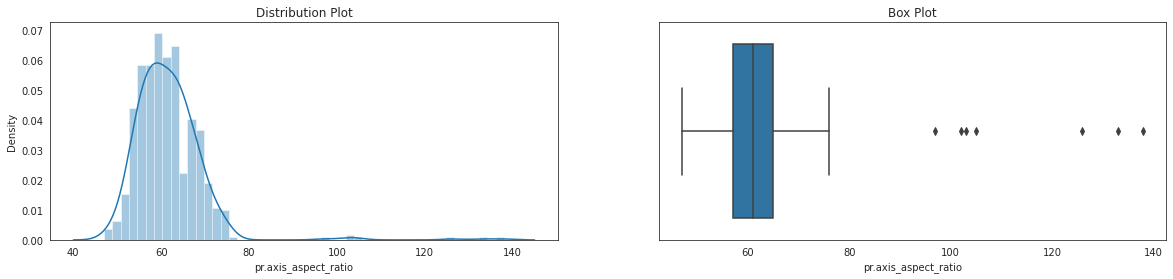

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

Here are many high outliers. Lets observe each of them and treat them

In [ ]:
handleOutlier(df_train['pr.axis_aspect_ratio'])

25th Quantile value:  57.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: pr.axis_aspect_ratio, dtype: float64)
75th Quantile value:  65.0
Outlier High Count =  7
List of High outliers: 

135    133.0
388    138.0
37     126.0
291    102.0
706    105.0
4      103.0
523     97.0
Name: pr.axis_aspect_ratio, dtype: float64


In [ ]:
# Lets observe full rows for these outliers
df_train.loc[[4,37,135,291,388,523,706]]

compactness  circularity  ...  hollows_ratio  class
4           85.0         44.0  ...          183.0    0.0
37          90.0         48.0  ...          194.0    2.0
135         89.0         47.0  ...          194.0    2.0
291         89.0         45.0  ...          192.0    2.0
388         94.0         47.0  ...          196.0    2.0
523         90.0         43.0  ...          196.0    2.0
706         82.0         43.0  ...          199.0    2.0

[7 rows x 19 columns]

In [ ]:
# Index 4  belongs to class Bus while others belong to class van. Lets observe max values of this column for
#both bus and van

In [ ]:
# Lets Check for Bus first
df_train[df_train['class']==0]['pr.axis_aspect_ratio'].sort_values( ascending=False).head(8)

4      103.0
84      76.0
88      75.0
450     75.0
556     75.0
275     75.0
69      74.0
431     74.0
Name: pr.axis_aspect_ratio, dtype: float64

For bus we can see values around 75 and max value 76. It is better to drop this row as the values 103 is
>>significantly higher

In [ ]:
df_train.drop(4, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Lets Check for van now first
df_train[df_train['class']==2]['pr.axis_aspect_ratio'].sort_values( ascending=False).head(20)

388    138.0
135    133.0
37     126.0
706    105.0
291    102.0
523     97.0
0       72.0
668     70.0
732     69.0
449     68.0
744     68.0
457     68.0
68      68.0
722     68.0
172     67.0
35      67.0
535     67.0
391     66.0
842     66.0
328     66.0
Name: pr.axis_aspect_ratio, dtype: float64

In [ ]:
##From 72 to 97 it is big jump in value and then other outlier values are even higher upto 138. It is better to drop 
#these rows

In [ ]:
df_train.drop([37,135,291,388,523,706], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_train

compactness  circularity  ...  hollows_ratio  class
679         89.0         41.0  ...          195.0    0.0
589        104.0         55.0  ...          196.0    1.0
724         94.0         45.0  ...          199.0    2.0
202        111.0         54.0  ...          198.0    1.0
374         87.0         36.0  ...          183.0    2.0
..           ...          ...  ...            ...    ...
586         98.0         55.0  ...          198.0    1.0
509        101.0         55.0  ...          195.0    1.0
544         88.0         43.0  ...          189.0    0.0
199         82.0         44.0  ...          185.0    0.0
178         93.0         37.0  ...          205.0    0.0

[580 rows x 19 columns]

#max.length_aspect_ratio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

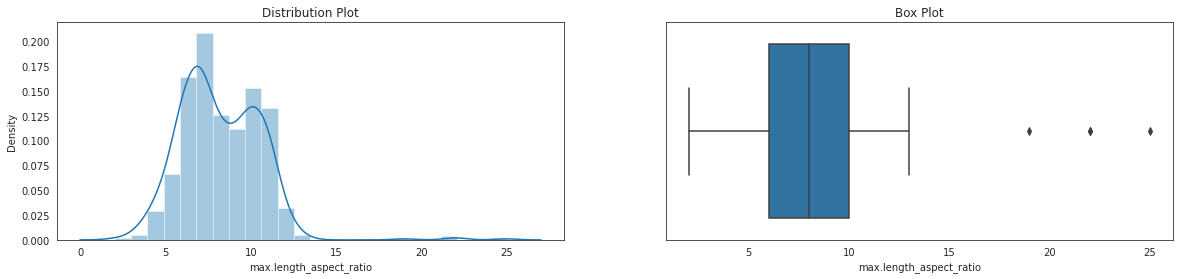

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [ ]:
handleOutlier(df_train['max.length_aspect_ratio'])

25th Quantile value:  6.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: max.length_aspect_ratio, dtype: float64)
75th Quantile value:  10.0
Outlier High Count =  4
List of High outliers: 

391    25.0
127    22.0
815    22.0
544    19.0
Name: max.length_aspect_ratio, dtype: float64


In [ ]:
# Lets observe full rows for these outliers
df_train.loc[[391,127,815,544]]

compactness  circularity  ...  hollows_ratio  class
391         91.0         38.0  ...          202.0    2.0
127         85.0         41.0  ...          191.0    0.0
815         81.0         45.0  ...          185.0    0.0
544         88.0         43.0  ...          189.0    0.0

[4 rows x 19 columns]

In [ ]:
# row with index 391 is for van and others are for bus. lets observe max values as ouliers are high in nature

In [ ]:
# Lets Check for van now first
df_train[df_train['class']==2]['max.length_aspect_ratio'].sort_values( ascending=False).head(20)

391    25.0
254    12.0
545    12.0
668    12.0
441    11.0
235    11.0
477    11.0
74     11.0
200    11.0
115    11.0
842    11.0
252    11.0
121    11.0
573    11.0
682    11.0
693    11.0
45     11.0
125    11.0
657    11.0
146    11.0
Name: max.length_aspect_ratio, dtype: float64

In [ ]:
# Outlier is double the max value which is 12. better drop this row

In [ ]:
df_train.drop(391, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
 #Lets Check for bus now
df_train[df_train['class']==0]['max.length_aspect_ratio'].sort_values( ascending=False).head(20)

127    22.0
815    22.0
544    19.0
304     8.0
274     8.0
218     8.0
765     8.0
390     8.0
714     8.0
770     8.0
108     8.0
590     8.0
553     8.0
529     8.0
322     8.0
36      7.0
412     7.0
129     7.0
178     7.0
199     7.0
Name: max.length_aspect_ratio, dtype: float64

In [ ]:
# Again for bus max length aspect ratio is 8 and Junp from 8 to 19/22 is too high. Lets drop this outlier from train set

In [ ]:
df_train.drop([127,815,544], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Scatter Ratio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

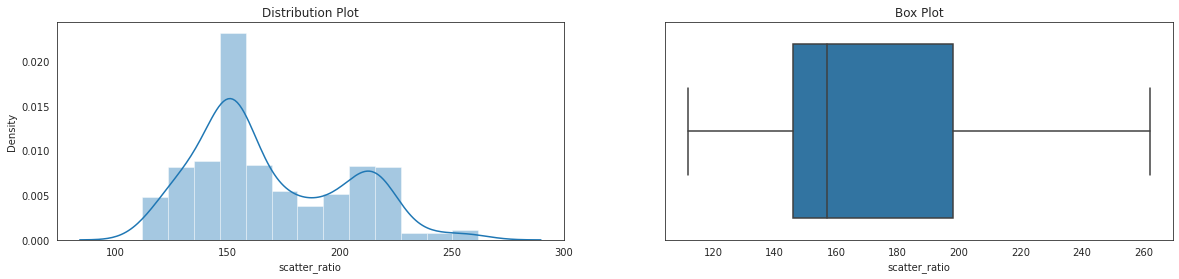

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

No Outlier in scatter ratio

#Elongatedness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

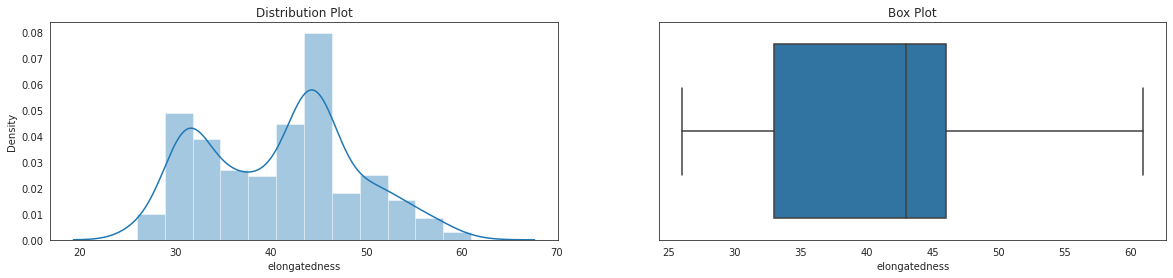

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

No Outlier in elongetdness

#pr.axis_rectangularity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

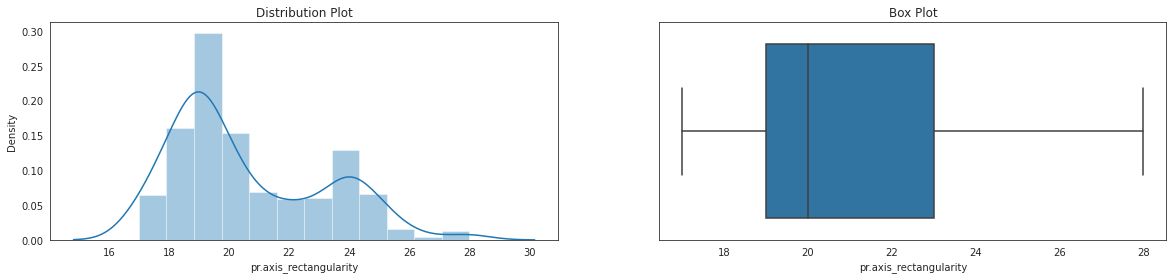

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

No Outlier in pr_axis_rectangularity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

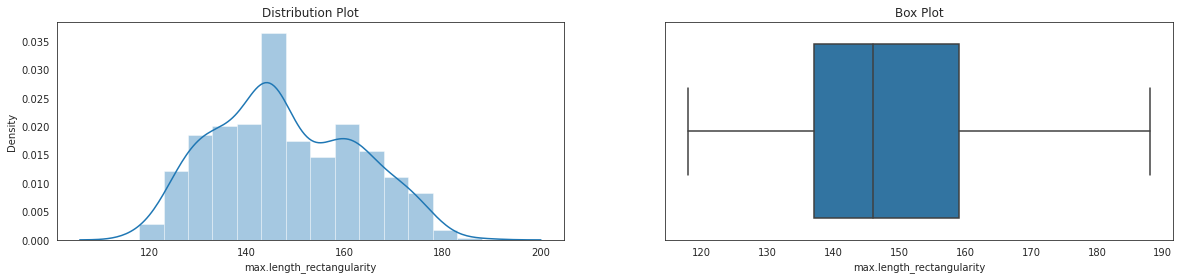

In [ ]:
#max.length_rectangularity
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

No Outlier in max.length_rectangularity

#scaled_variance¶

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

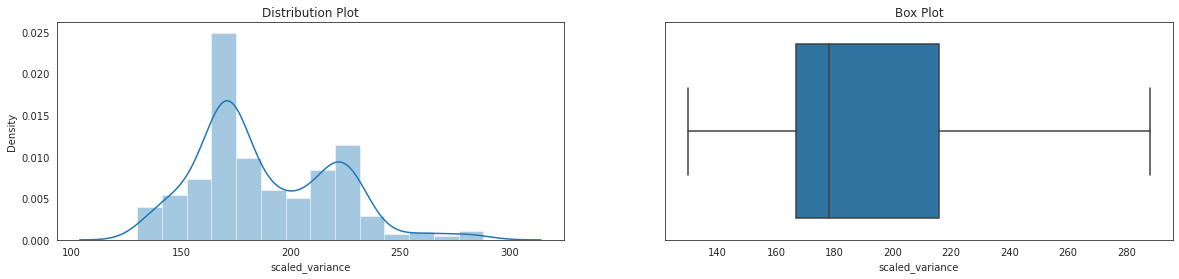

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

No Outlier in scaled_variance

#scaled_variance.1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

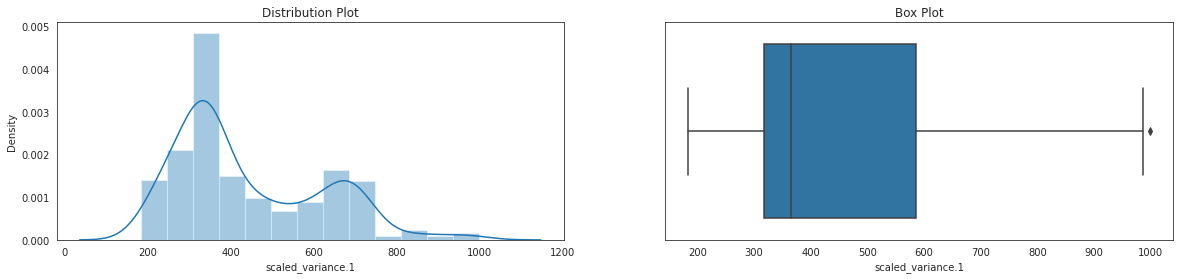

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

There is one outlier in scaled_Variance.1

In [ ]:
handleOutlier(df_train['scaled_variance.1'])

25th Quantile value:  318.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_variance.1, dtype: float64)
75th Quantile value:  586.25
Outlier High Count =  1
List of High outliers: 

85    998.0
Name: scaled_variance.1, dtype: float64


In [ ]:
# Lets observe full row for this outliers
df_train.loc[[85]]

compactness  circularity  ...  hollows_ratio  class
85        110.0         58.0  ...          182.0    0.0

[1 rows x 19 columns]

In [ ]:
# The outlier belongs to class car. Lets observe max values as it is high outlier
df_train[df_train['class']==0]['scaled_variance.1'].sort_values( ascending=False).head(8)

85     998.0
687    987.0
321    982.0
733    968.0
5      957.0
274    954.0
155    928.0
381    923.0
Name: scaled_variance.1, dtype: float64

There are values in contnuity like 982,987, 962 hence 998 does not look very high. We will leave this outlier as is.

#scaled_radius_of_gyration.1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

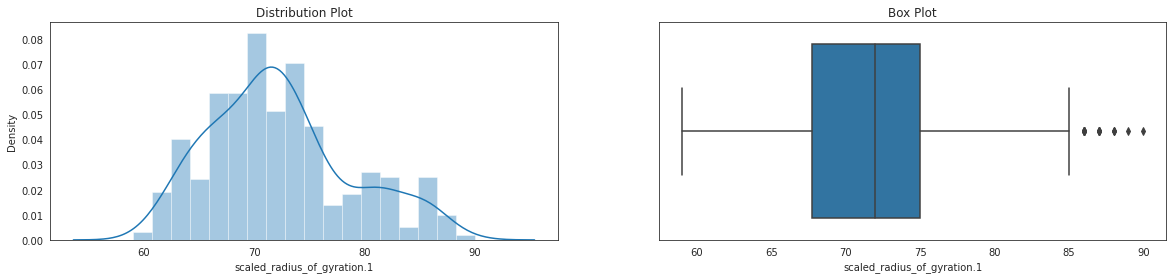

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

lot of high outliers

In [ ]:
handleOutlier(df_train['scaled_radius_of_gyration.1'])

25th Quantile value:  67.75
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_radius_of_gyration.1, dtype: float64)
75th Quantile value:  75.0
Outlier High Count =  21
List of High outliers: 

687    86.0
734    87.0
492    86.0
834    86.0
515    87.0
351    86.0
41     86.0
231    86.0
232    86.0
160    87.0
553    86.0
79     88.0
568    87.0
612    87.0
230    89.0
655    90.0
420    86.0
463    87.0
790    87.0
47     88.0
381    88.0
Name: scaled_radius_of_gyration.1, dtype: float64


In [ ]:
# Lets observe full row for this outliers
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]]

compactness  circularity  ...  hollows_ratio  class
687        106.0         57.0  ...          184.0    0.0
734         88.0         40.0  ...          183.0    2.0
492         85.0         43.0  ...          183.0    0.0
834         82.0         36.0  ...          182.0    1.0
515         76.0         38.0  ...          184.0    1.0
351         88.0         38.0  ...          183.0    1.0
41          88.0         37.0  ...          183.0    2.0
231         85.0         33.0  ...          183.0    1.0
232         81.0         44.0  ...          183.0    0.0
160         82.0         38.0  ...          183.0    1.0
553         86.0         45.0  ...          182.0    0.0
79          89.0         44.0  ...          182.0    0.0
568         86.0         43.0  ...          182.0    0.0
612         80.0         34.0  ...          183.0    1.0
230         85.0         35.0  ...          184.0    2.0
655         86.0         35.0  ...          183.0    2.0
420         96.0         39.0  ...          182.0    2.0
463         85.0         40.0  ...          183.0    1.0
790         85.0         43.0  ...          181.0    0.0
47          85.0         42.0  ...          182.0    0.0
381        106.0         54.0  ...          182.0    0.0

[21 rows x 19 columns]

In [ ]:
# Lets observe full row for this outliers for class Bus
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]][df_train['class']==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


compactness  circularity  ...  hollows_ratio  class
687        106.0         57.0  ...          184.0    0.0
492         85.0         43.0  ...          183.0    0.0
232         81.0         44.0  ...          183.0    0.0
553         86.0         45.0  ...          182.0    0.0
79          89.0         44.0  ...          182.0    0.0
568         86.0         43.0  ...          182.0    0.0
790         85.0         43.0  ...          181.0    0.0
47          85.0         42.0  ...          182.0    0.0
381        106.0         54.0  ...          182.0    0.0

[9 rows x 19 columns]

In [ ]:
# The outlier belongs to class car. Lets observe max values as it is high outlier
df_train[df_train['class']==0]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(20)


381    88.0
47     88.0
79     88.0
790    87.0
568    87.0
492    86.0
232    86.0
687    86.0
553    86.0
322    85.0
685    85.0
321    85.0
785    85.0
529    85.0
444    85.0
733    85.0
580    85.0
155    85.0
390    85.0
5      85.0
Name: scaled_radius_of_gyration.1, dtype: float64

 Values ouliers for buses are almost in range of max. We will neithr delete them nor replace them-leave as is

In [ ]:
# Lets observe full row for this outliers for class van
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]][df_train['class']==2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


compactness  circularity  ...  hollows_ratio  class
734         88.0         40.0  ...          183.0    2.0
41          88.0         37.0  ...          183.0    2.0
230         85.0         35.0  ...          184.0    2.0
655         86.0         35.0  ...          183.0    2.0
420         96.0         39.0  ...          182.0    2.0

[5 rows x 19 columns]

In [ ]:
# The outliers belong to class van. Lets observe max values as it is high outlier
df_train[df_train['class']==2]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(20)

655    90.0
230    89.0
734    87.0
420    86.0
41     86.0
534    85.0
617    85.0
374    85.0
546    85.0
594    84.0
318    82.0
21     82.0
751    81.0
16     80.0
779    80.0
62     80.0
445    79.0
456    79.0
269    79.0
550    78.0
Name: scaled_radius_of_gyration.1, dtype: float64

Values ouliers for vans are almost in range of max. We will neither delete them nor replace them-leave as is

In [ ]:
# Lets observe full row for this outliers for class car
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]][df_train['class']==1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


compactness  circularity  ...  hollows_ratio  class
834         82.0         36.0  ...          182.0    1.0
515         76.0         38.0  ...          184.0    1.0
351         88.0         38.0  ...          183.0    1.0
231         85.0         33.0  ...          183.0    1.0
160         82.0         38.0  ...          183.0    1.0
612         80.0         34.0  ...          183.0    1.0
463         85.0         40.0  ...          183.0    1.0

[7 rows x 19 columns]

In [ ]:
# The outlier belongs to class car. Lets observe max values as it is high outlier
df_train[df_train['class']==1]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(20)

612    87.0
160    87.0
463    87.0
515    87.0
351    86.0
834    86.0
231    86.0
342    85.0
411    84.0
29     83.0
614    83.0
289    83.0
73     82.0
26     82.0
688    82.0
260    81.0
89     81.0
229    80.0
380    80.0
662    79.0
Name: scaled_radius_of_gyration.1, dtype: float64

Values ouliers for cars are almost in range of max. We will neither delete them nor replace them-leave as is

#Skewness_about

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

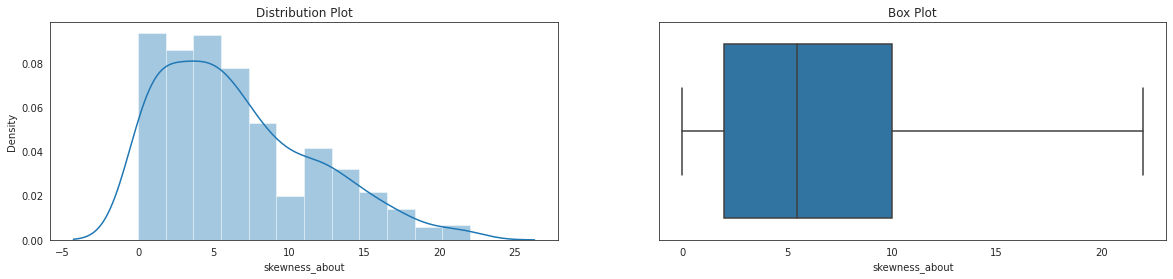

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

No outlier in skewness_about field

In [ ]:
 handleOutlier(df_train['skewness_about.1'])

25th Quantile value:  5.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: skewness_about.1, dtype: float64)
75th Quantile value:  19.0
Outlier High Count =  1
List of High outliers: 

132    41.0
Name: skewness_about.1, dtype: float64


In [ ]:
#Lets observe the full row of the outlier
df_train.loc[[132]]
# Outlier belongs to class 1 that is car

compactness  circularity  ...  hollows_ratio  class
132         97.0         42.0  ...          206.0    1.0

[1 rows x 19 columns]

In [ ]:
##Lets observe max values for car class
df_train[df_train['class']==1]['skewness_about.1'].sort_values( ascending=False).head(20)

132    41.0
513    40.0
142    39.0
361    38.0
176    38.0
623    38.0
33     38.0
624    36.0
506    36.0
298    35.0
570    35.0
730    35.0
413    35.0
622    34.0
439    33.0
507    33.0
106    33.0
158    33.0
427    33.0
317    32.0
Name: skewness_about.1, dtype: float64

Value is well in range of max value of skewness_about.1 for cars. we will not delete or replace it

#Skewness_about.2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

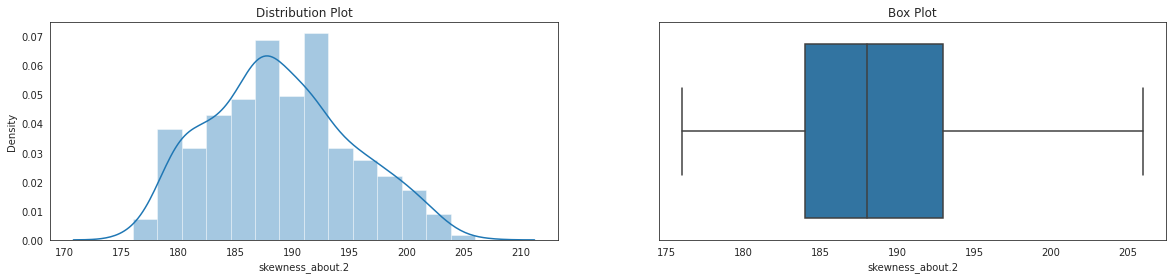

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

No Outliers for skewness_about.2

#Hollows ratio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

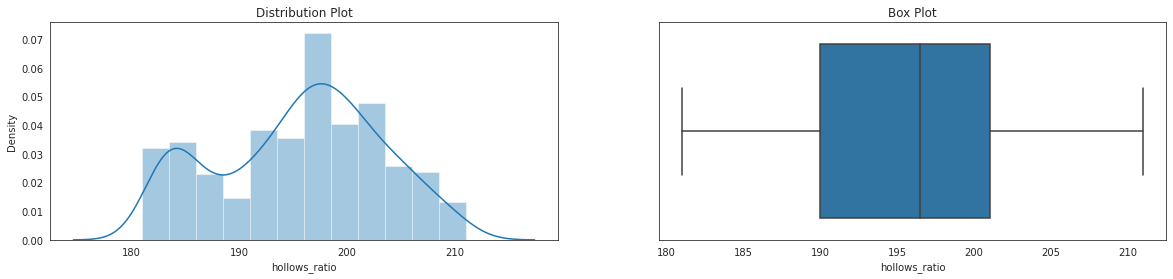

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

No Outliers for hollows_ratio

Final shape and statistic of train set after missing values and outlier treatmen

In [ ]:
df_train.describe().T

count        mean  ...     75%    max
compactness                  576.0   93.859375  ...  100.00  119.0
circularity                  576.0   44.776042  ...   49.00   58.0
distance_circularity         576.0   81.966146  ...   98.00  112.0
radius_ratio                 576.0  167.369792  ...  194.00  246.0
pr.axis_aspect_ratio         576.0   60.989583  ...   65.00   76.0
max.length_aspect_ratio      576.0    8.081597  ...   10.00   13.0
scatter_ratio                576.0  168.765625  ...  198.00  262.0
elongatedness                576.0   40.965278  ...   46.00   61.0
pr.axis_rectangularity       576.0   20.572917  ...   23.00   28.0
max.length_rectangularity    576.0  147.788194  ...  159.00  188.0
scaled_variance              576.0  188.003472  ...  216.00  288.0
scaled_variance.1            576.0  439.654514  ...  586.25  998.0
scaled_radius_of_gyration    576.0  174.571181  ...  196.00  264.0
scaled_radius_of_gyration.1  576.0   72.270833  ...   75.00   90.0
skewness_about               576.0    6.572917  ...   10.00   22.0
skewness_about.1             576.0   12.614583  ...   19.00   41.0
skewness_about.2             576.0  188.940972  ...  193.00  206.0
hollows_ratio                576.0  195.538194  ...  201.00  211.0
class                        576.0    0.984375  ...    1.00    2.0

[19 rows x 8 columns]

#PCA & Dimensionality Reduction

In [ ]:
# Divide train and test set into feature and target sets
X_train=df_train.drop(labels='class', axis=1)
y_train=df_train['class']
X_test=df_test.drop(labels='class', axis=1)
y_test=df_test['class']
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((576, 18), (576,), (252, 18), (252,))

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X_train) # Fit scaler in train set

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# transform train set
#Transform X_train
X_train_std=sc.transform(X_train)
#Transform X_test ( with same fit as train) to prevent data leak
X_test_std=sc.transform(X_test)

In [ ]:
# Covariance Matrix
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00173913  0.689327    0.78560004  0.74525464  0.19732104  0.49800803
   0.81538134 -0.78869156  0.81634123  0.67127911  0.79730023  0.81976224
   0.58454568 -0.25923544  0.23081191  0.20819152  0.30836727  0.36310217]
 [ 0.689327    1.00173913  0.79400049  0.64979201  0.20875018  0.55801482
   0.85326977 -0.82283416  0.84981767  0.96449696  0.81336733  0.84405617
   0.93038751  0.02759018  0.14533538  0.03516042 -0.07446508  0.07301574]
 [ 0.78560004  0.79400049  1.00173913  0.81174228  0.24803189  0.68431376
   0.90589819 -0.91239855  0.89405732  0.77391678  0.88460798  0.88607431
   0.70171594 -0.28486652  0.1055065   0.31886685  0.17849772  0.36523004]
 [ 0.74525464  0.64979201  0.81174228  1.00173913  0.66922423  0.45812062
   0.79501937 -0.85000213  0.76818089  0.57795279  0.80196398  0.78302328
   0.55847194 -0.42349384  0.05113078  0.21536759  0.45345249  0.51933882]
 [ 0.19732104  0.20875018  0.24803189  0.66922423  1.00173913  0.11493989
   0.2070305

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.71596264e-01 -6.96356673e-02 -6.97610023e-02  1.03148690e-01
  -1.94482824e-01  2.77452626e-01  2.33427921e-01 -7.47394603e-01
   3.51448950e-01 -1.28972017e-01 -5.79321565e-02 -1.23843451e-02
  -1.08266234e-01  1.49537406e-01 -5.92294210e-04 -5.67304050e-03
  -1.45786401e-02 -1.24115852e-03]
 [-2.84265536e-01  1.37477622e-01 -1.93007186e-01 -1.10657238e-01
   1.34825186e-01 -7.86148139e-02 -3.65115690e-01 -1.00533085e-01
   5.68644062e-02  2.42725610e-01 -5.38398301e-02 -6.22761880e-02
  -2.99550099e-01 -1.77915709e-01 -4.45773675e-03  1.31241518e-01
   6.03613649e-01  3.33342892e-01]
 [-3.00811275e-01 -4.27352694e-02  1.37840322e-02  1.31112970e-01
   8.67344871e-02 -3.26997069e-02  1.72160513e-01  2.97595251e-01
   2.37971562e-01 -1.11874929e-02 -7.75310675e-01  2.75463117e-01
   8.62465032e-02 -3.74714905e-02  4.65519826e-03 -3.95868274e-02
   7.35137815e-02 -1.18040304e-01]
 [-2.73502665e-01 -1.92164331e-01  1.48142448e-01 -2.17666662e-01
  -1.21234345e-01 -

In [ ]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2   ...        15        16        17
0  9.889231  3.340128  1.232317  ...  0.006635  0.016991  0.012644

[1 rows x 18 columns]

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.84478757  73.36883869  80.20316054  86.76896755  91.70815148
  94.97983079  96.68088627  97.93137591  98.53102447  98.93108577
  99.24348952  99.48381644  99.64243806  99.79645755  99.89068975
  99.96081201  99.99761117 100.        ]


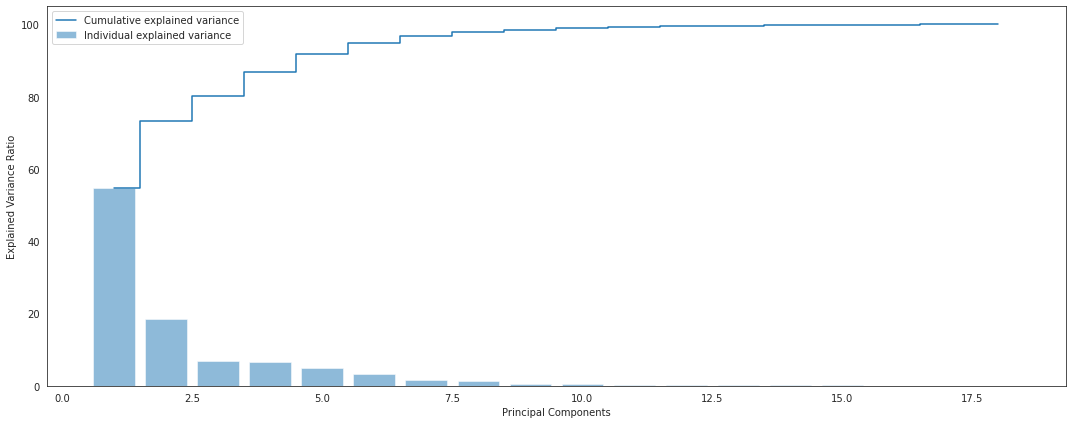

In [ ]:
# Ploting & visualization
plt.figure(figsize=(15 , 6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

First 8 principal components explain 98% of the variance in the data.

In [ ]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue by default take first field for sorting
eig_pairs.sort(reverse=True)


# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

In [ ]:
#Dimesionality reduction 

P_reduce = np.array(eigvectors_sorted[0:8]).transpose()   # Selecting first 8 eigen vector out if 18

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [ ]:
#Check shapes of train and test new feature and target set after PCA
Proj_train_data.shape,y_train.shape,Proj_test_data.shape,y_test.shape

((576, 8), (576,), (252, 8), (252,))

#Modelling,Hyperparameter tuning & Cross Validation

With Linear Kernel

In [ ]:
# Use SVM

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

In [ ]:
# check the accuracy on the training set
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.9114583333333334
0.9087301587301587


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 55   7   0]
 [  4 121   0]
 [  2  10  53]]


#With Rbf

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

In [ ]:
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))

0.9722222222222222
0.9563492063492064


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 59   3   0]
 [  1 129   0]
 [  1   6  53]]


#Hyper Parameter Tuning

In [ ]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
      #    'gamma':[0.01, 0.02 , 0.03 , 0.04, 0.05],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
gs = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=10)
#Learning
gs.fit(Proj_train_data,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


K-fold cross validation( On train set using tuned Hyper parameter i.e gs

In [ ]:
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = gs
results = cross_val_score(gs,Proj_train_data,y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.96551724 0.96551724 0.98275862 0.89655172 0.98275862 0.96551724
 0.92982456 0.92982456 0.85964912 1.        ]
Accuracy: 94.779% (4.142%)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


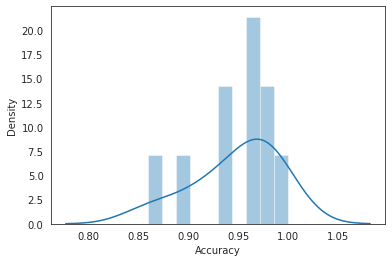

95.0 confidence interval 86.8% and 99.6%


In [ ]:
#plt.hist(results,normed= True)
sns.distplot(results,kde=True,bins=10)
plt.xlabel("Accuracy")
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Test Accuracy with Hypertuned parameter

In [ ]:
prediction=gs.predict(Proj_test_data)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,prediction))

Accuracy: 0.9563492063492064
Confusion Matrix:
 [[ 59   1   1]
 [  3 129   6]
 [  0   0  53]]


Looking at the confusion matrix, model predicts all the vans correctly through Silhoutte(100%) 59/62 buses are predicted correctly(95 %) 129/138 cars are predicted correctyy(93.5%)

Test Accuracy(95.64%) is well in range of 95% confidence interval(86.8% to 99.6%)